In [180]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')

In [181]:
df = pd.read_csv('../datasets/updated_uber.csv')

df_original = df.copy()
df.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [182]:
df.shape

(200000, 7)

In [183]:
df['fare_amount'].isnull().sum()

0

In [184]:
fare_mean = df['fare_amount'].mean()
fare_std = df['fare_amount'].std()

df_fare = df.copy()

df_fare = df[(df['fare_amount'] >= (fare_mean - fare_std)) & (df['fare_amount'] <= (fare_mean + fare_std))]
df_fare

df = df_fare

df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [185]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [186]:
df_passenger = df.copy()
df['passenger_count'].describe()

count    181342.000000
mean          1.681635
std           1.392402
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64

In [187]:
df['passenger_count'].isnull().sum()

0

In [188]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [189]:
df['passenger_count'].value_counts()

passenger_count
1      125799
2       26427
5       12717
3        8049
4        3861
6        3819
0         669
208         1
Name: count, dtype: int64

In [190]:
df_passenger = df[(df['passenger_count'] != 0) & (df['passenger_count'] != 208)]
df_passenger

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [191]:
df_passenger['passenger_count'].value_counts()

passenger_count
1    125799
2     26427
5     12717
3      8049
4      3861
6      3819
Name: count, dtype: int64

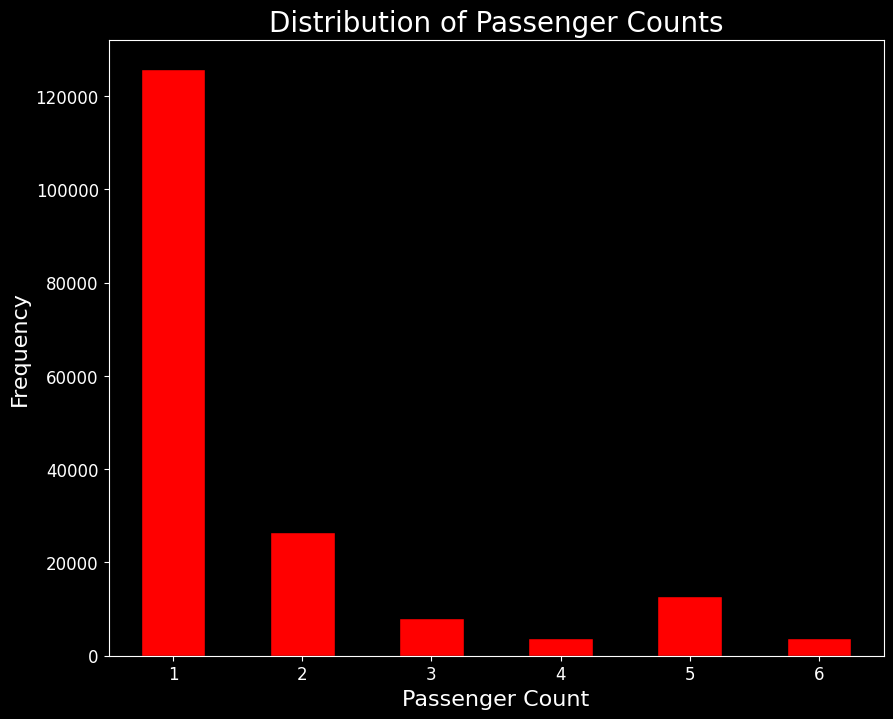

In [192]:
value_counts = df_passenger['passenger_count'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
value_counts.plot(kind='bar', color='red', edgecolor='black')
plt.title('Distribution of Passenger Counts', fontsize=20)
plt.xlabel('Passenger Count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=0, fontsize=12) 
plt.yticks(fontsize=12)
plt.show()

In [193]:
df = df_passenger

In [194]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


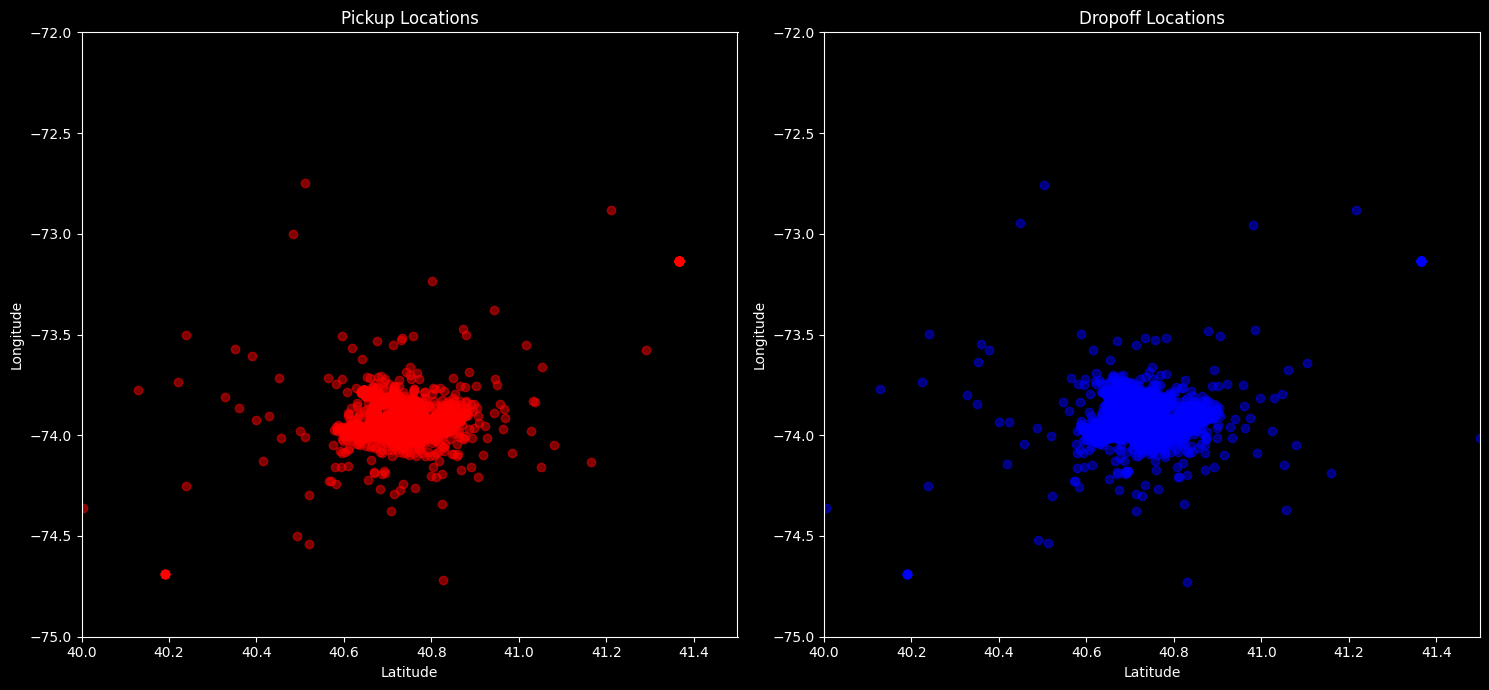

In [195]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot for pickup locations
axs[0].scatter(x = df['pickup_latitude'], y = df['pickup_longitude'], c='red', alpha=0.5)
axs[0].set_xlim(40, 41.5)
axs[0].set_ylim(-75, -72)
axs[0].set_title('Pickup Locations')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')

# Second subplot for dropoff locations
axs[1].scatter(x = df['dropoff_latitude'], y = df['dropoff_longitude'], c='blue', alpha=0.5)
axs[1].set_xlim(40, 41.5)
axs[1].set_ylim(-75, -72)
axs[1].set_title('Dropoff Locations')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')

plt.tight_layout()
plt.show()

**Based on our observations of the world map plot, the points are predominantly located within the latitude range of 40.0 to 41.4 and the longitude range of -75 to -72.5.**


**The coordinates of New York are (40.730610, -73.935242), which confirms the accuracy of our dataset.**

**We would reduce our dataset to :**
- Latitude Range : 40.75258181709071 to 40.752812309438696
- Longitude Range : -73.98193908743959 to -73.98095037980285

In [196]:
df_lat_long = df.copy()
df_lat_long.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [197]:
df_lat_long.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,180672.000000,180672.000000,180672.000000,180672.000000,180672.000000,180672.00000
mean,8.839162,-72.549593,39.951311,-72.549300,39.937971,1.68672
std,3.994678,11.366819,7.816772,13.317093,6.799091,1.30379
min,2.500000,-1340.648410,-74.009697,-3356.666300,-881.985513,1.00000
25%,5.700000,-73.992342,40.735817,-73.991658,40.735458,1.00000
50%,8.000000,-73.982243,40.752552,-73.980876,40.753246,1.00000
75%,11.000000,-73.969112,40.766496,-73.966861,40.767342,2.00000
max,21.070000,57.418457,1644.421482,1153.572603,872.697628,6.00000


In [198]:
df_lat_long = df_lat_long[(df_lat_long['pickup_latitude'] >= 40.3) & (df_lat_long['pickup_latitude'] <= 41.2) & (df_lat_long['pickup_longitude'] >= -75) & (df_lat_long['pickup_longitude'] <= -73) & (df_lat_long['dropoff_latitude'] >= 40.3) & (df_lat_long['dropoff_latitude'] <= 41.2) & (df_lat_long['dropoff_longitude'] >= -75) & (df_lat_long['dropoff_longitude'] <= -73)]
df_lat_long.shape

(176863, 7)

In [199]:
df_lat_long

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [200]:
df_copy = df_lat_long.copy()
for i in df_copy.columns:
    if(i == 'pickup_longitude' or i == 'pickup_latitude' or i == 'dropoff_longitude' or i == 'dropoff_latitude'):
        Q1 = df_copy[i].quantile(0.25)
        Q3 = df_copy[i].quantile(0.75)
        IQR = Q3 - Q1
        df_copy = df_copy[df_copy[i] <= (Q3+(1.5*IQR))]
        df_copy = df_copy[df_copy[i] >= (Q1-(1.5*IQR))]

df_lat_long = df_copy

print("Latitude Range :",df_copy['pickup_latitude'].mean(),"to",df_copy['dropoff_latitude'].mean())
print("Longitude Range :",df_copy['pickup_longitude'].mean(),"to",df_copy['dropoff_longitude'].mean())


Latitude Range : 40.75265193478451 to 40.75301994992596
Longitude Range : -73.9819871439615 to -73.98110540536143


In [201]:
df_lat_long

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [202]:
df_lat_long.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,165129.000000,165129.000000,165129.000000,165129.000000,165129.000000,165129.000000
mean,8.581785,-73.981987,40.752652,-73.981105,40.753020,1.688383
std,3.769323,0.015949,0.021060,0.016627,0.022145,1.304965
min,2.500000,-74.025460,40.693108,-74.025485,40.692508,1.000000
25%,5.700000,-73.992850,40.738140,-73.992261,40.738190,1.000000
50%,7.700000,-73.982932,40.753414,-73.982079,40.754147,1.000000
75%,10.500000,-73.971631,40.766547,-73.970662,40.767327,2.000000
max,21.070000,-73.937010,40.810775,-73.935367,40.812578,6.000000


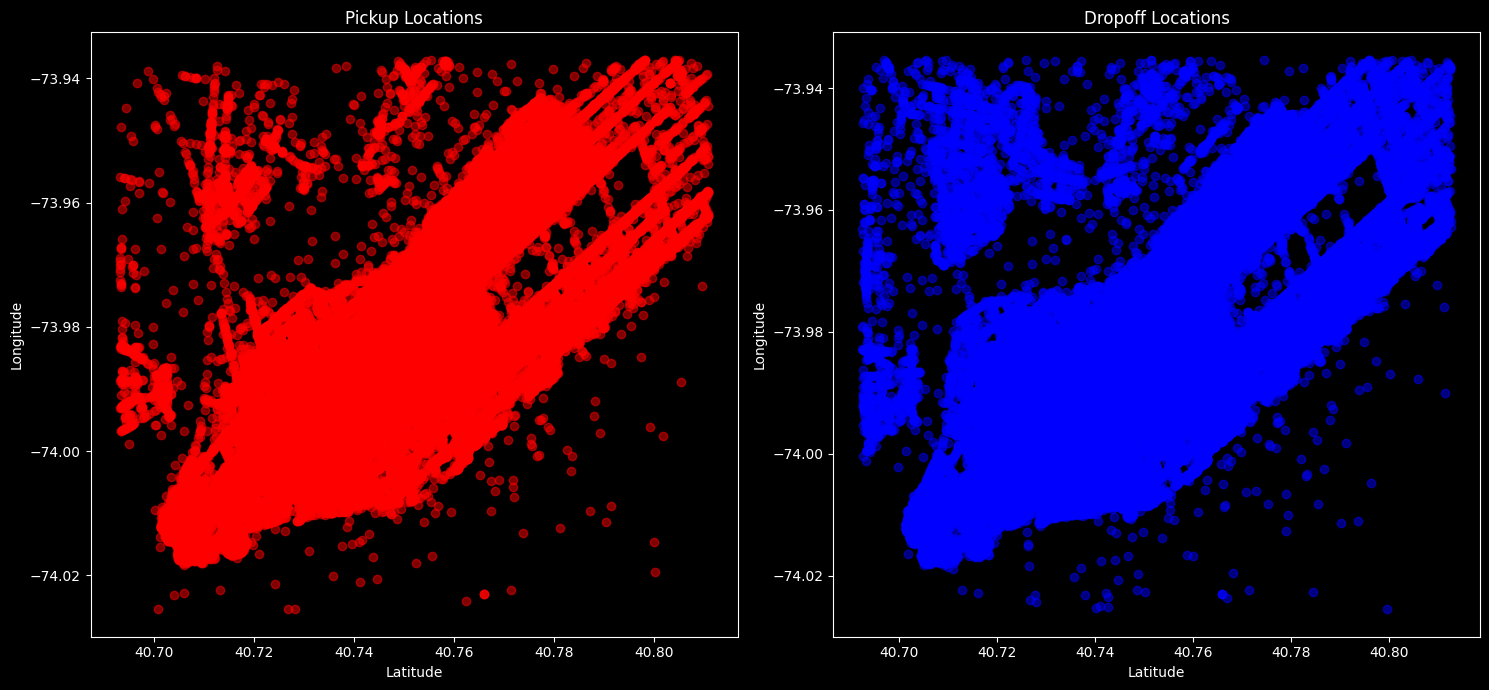

In [203]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot for pickup locations
axs[0].scatter(x = df_lat_long['pickup_latitude'], y = df_lat_long['pickup_longitude'], c='red', alpha=0.5)

axs[0].set_title('Pickup Locations')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')

# Second subplot for dropoff locations
axs[1].scatter(x = df_lat_long['dropoff_latitude'], y = df_lat_long['dropoff_longitude'], c='blue', alpha=0.5)

axs[1].set_title('Dropoff Locations')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')

plt.tight_layout()
plt.show()

In [204]:
df = df_lat_long

In [205]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


**Finding the distance between pickup and dropoff location.**

In [206]:
from math import sin, cos, sqrt, atan2, radians
# Radius of the Earth in kilometers
earth_radius_km = 6373.0

def calc_distance(df):
    dist = []
    for index, row in df.iterrows():
        latitude1 = radians(row['pickup_latitude'])
        longitude1 = radians(row['pickup_longitude'])
        
        latitude2 = radians(row['dropoff_latitude'])
        longitude2 = radians(row['dropoff_longitude'])
        
        delta_longitude = longitude2 - longitude1
        delta_latitude = latitude2 - latitude1
        
        # Haversine formula to calculate the distance
        a = sin(delta_latitude / 2)**2 + cos(latitude1) * cos(latitude2) * sin(delta_longitude / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
                
        distance_km = earth_radius_km * c
        dist.append(distance_km)
    return np.array(dist)    

In [207]:
calc_distance(df)

array([1.68385119, 2.45836138, 5.03795822, ..., 1.87563879, 3.54082665,
       5.41948424])

In [208]:
df_c = df.copy()
df_c['Distance'] = calc_distance(df)
df = df_c

In [209]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683851
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.458361
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.037958
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.662205
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
...,...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1,1.123230
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112245
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875639
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.540827


In [210]:
df['Distance'].describe()

count    165129.000000
mean          2.325353
std           1.579046
min           0.000000
25%           1.175782
50%           1.911820
75%           3.065497
max          12.343117
Name: Distance, dtype: float64

In [211]:
df = df[df['Distance'] != 0]

In [212]:
df['Distance'].describe()

count    163714.000000
mean          2.345452
std           1.570922
min           0.000084
25%           1.192632
50%           1.926760
75%           3.080024
max          12.343117
Name: Distance, dtype: float64

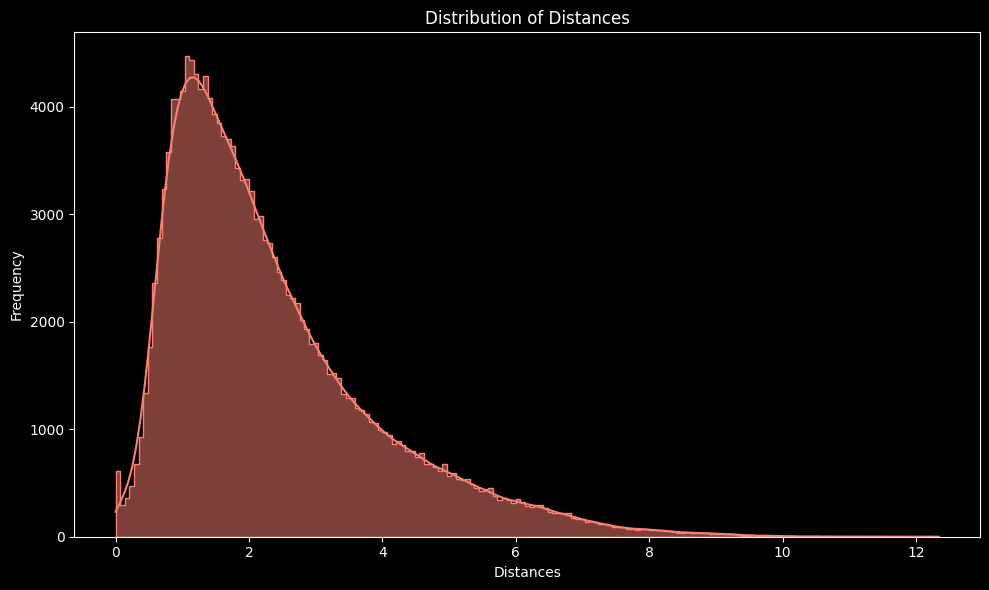

In [213]:
# Plot the distance histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Distance', element='step', color='salmon',kde=True)
plt.title('Distribution of Distances')
plt.xlabel('Distances')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [214]:
df_time = df.copy()

In [215]:
df_time

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683851
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.458361
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.037958
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.662205
8,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1,2.333443
...,...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00 UTC,-73.983070,40.760770,-73.972972,40.754177,1,1.123230
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112245
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875639
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.540827


In [216]:
df_time['pickup_datetime']=pd.to_datetime(df_time['pickup_datetime'])
df_time

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683851
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.458361
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.037958
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.662205
8,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.333443
...,...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,1.123230
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112245
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875639
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.540827


In [217]:
df_time['year'] = df_time['pickup_datetime'].dt.year
df_time['month'] = df_time['pickup_datetime'].dt.month
df_time['day'] = df_time['pickup_datetime'].dt.day
df_time['hour'] = df_time['pickup_datetime'].dt.hour
df_time['minute'] = df_time['pickup_datetime'].dt.minute
df_time['second'] = df_time['pickup_datetime'].dt.second
df_time['weekday'] = df_time['pickup_datetime'].dt.weekday

In [218]:
print(df_time['pickup_datetime'].max())
print(df_time['pickup_datetime'].min())
print(df_time['pickup_datetime'].mean())

2015-06-30 23:33:33+00:00
2009-01-01 01:15:22+00:00
2012-03-10 10:20:29.955000576+00:00


In [219]:
import warnings
warnings.filterwarnings("ignore")

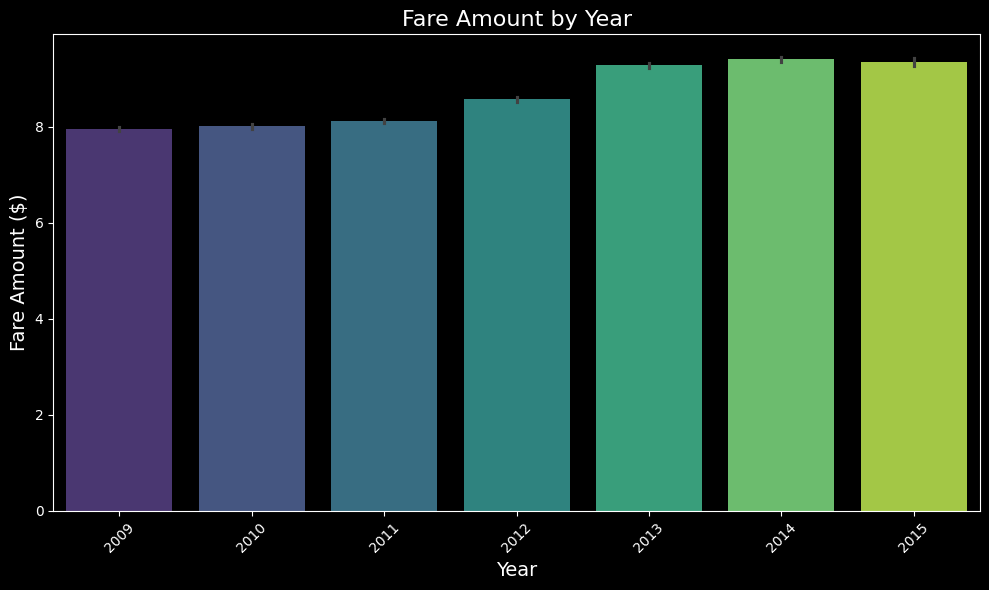

In [220]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='year', y='fare_amount', data=df_time, palette="viridis")
bar_plot.set_title("Fare Amount by Year", fontsize=16)
bar_plot.set_xlabel("Year", fontsize=14)
bar_plot.set_ylabel("Fare Amount ($)", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

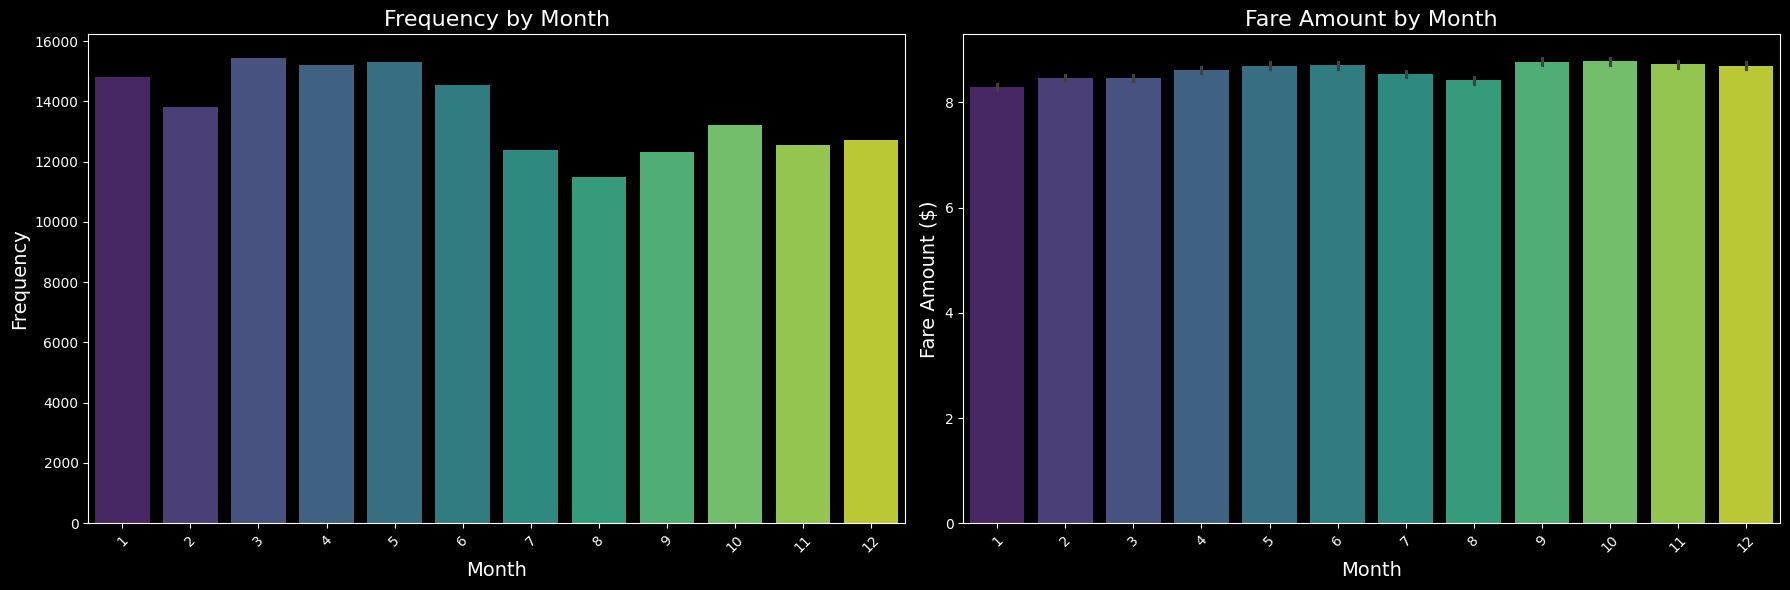

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(ax=axes[0], x='month', data=df_time, palette="viridis")
axes[0].set_title("Frequency by Month", fontsize=16)
axes[0].set_xlabel("Month", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)

sns.barplot(ax=axes[1], x='month', y = 'fare_amount',data=df_time, palette="viridis")
axes[1].set_title("Fare Amount by Month", fontsize=16)
axes[1].set_xlabel("Month", fontsize=14)
axes[1].set_ylabel("Fare Amount ($)", fontsize=14)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

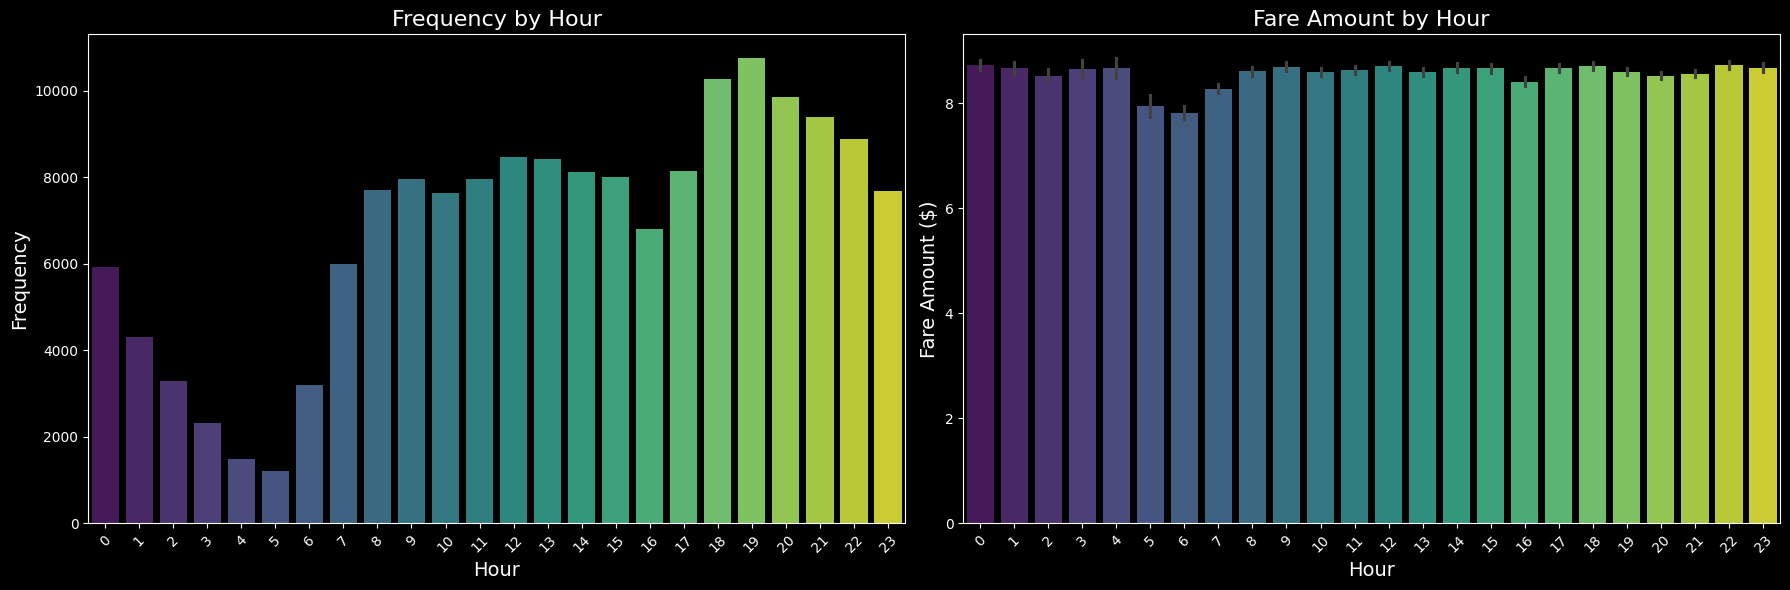

In [222]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(ax=axes[0], x='hour', data=df_time, palette="viridis")
axes[0].set_title("Frequency by Hour", fontsize=16)
axes[0].set_xlabel("Hour", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)

sns.barplot(ax=axes[1], x='hour', y = 'fare_amount',data=df_time, palette="viridis")
axes[1].set_title("Fare Amount by Hour", fontsize=16)
axes[1].set_xlabel("Hour", fontsize=14)
axes[1].set_ylabel("Fare Amount ($)", fontsize=14)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [225]:
monthly_mapping = {
    1: 'Q1',
    2: 'Q1',
    3: 'Q1',
    4: 'Q2',
    5: 'Q2',
    6: 'Q2',
    7: 'Q3',
    8: 'Q3',
    9: 'Q3',
    10: 'Q4',
    11: 'Q4',
    12: 'Q4'
}

hourly_mapping = {0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'}

In [227]:
df_time['monthly_quarters'] = df_time['month'].map(monthly_mapping)
df_time['hourly_quarters'] = df_time['hour'].map(hourly_mapping)

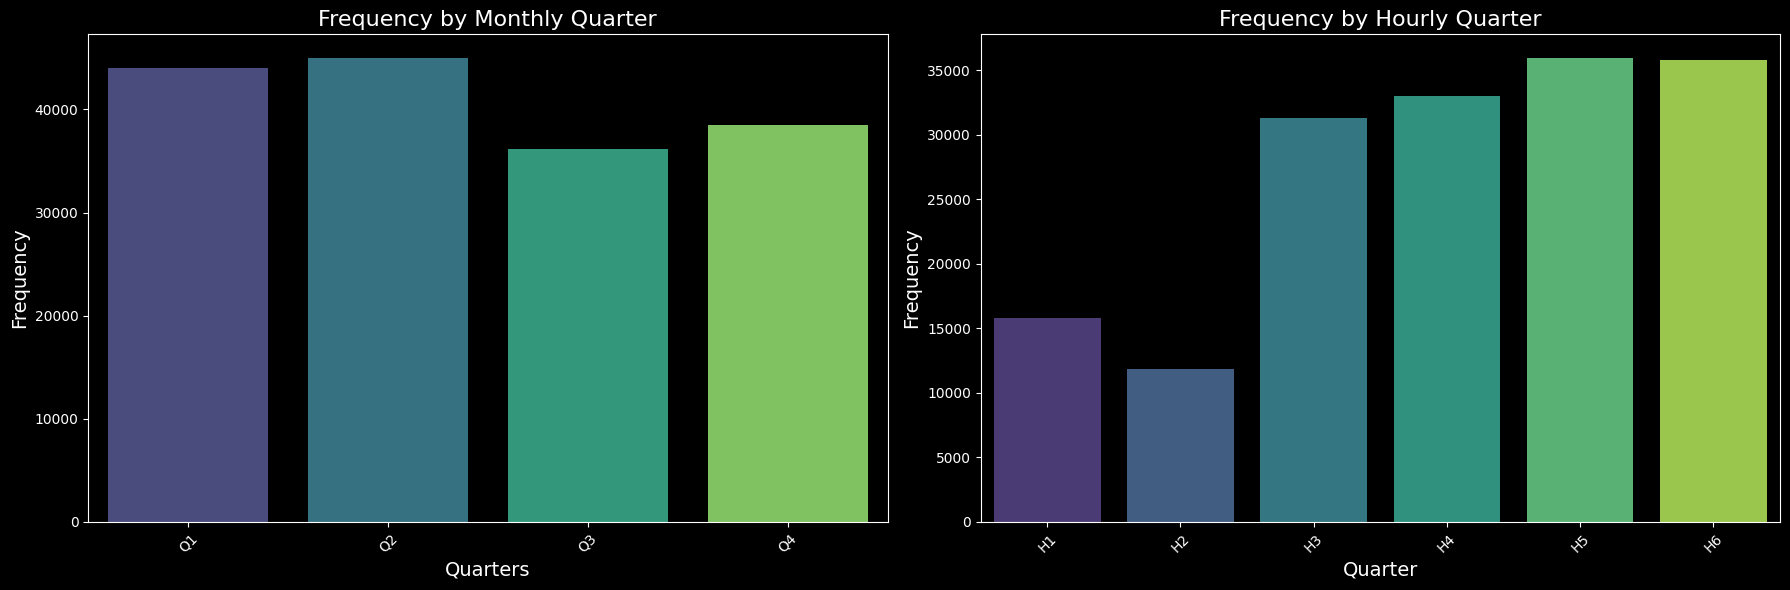

In [231]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

quarters_order = sorted(df_time['monthly_quarters'].unique())
hours_order = sorted(df_time['hourly_quarters'].unique())

sns.countplot(ax=axes[0], x='monthly_quarters', order = quarters_order, data=df_time, palette="viridis")
axes[0].set_title("Frequency by Monthly Quarter", fontsize=16)
axes[0].set_xlabel("Quarters", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)

sns.countplot(ax=axes[1], x='hourly_quarters', order = hours_order, data=df_time, palette="viridis")
axes[1].set_title("Frequency by Hourly Quarter", fontsize=16)
axes[1].set_xlabel("Quarter", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [232]:
df_time

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,month,day,hour,minute,second,weekday,monthly_quarters,hourly_quarters
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683851,2015,5,7,19,52,6,3,Q2,H5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.458361,2009,7,17,20,4,56,4,Q3,H6
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.037958,2009,8,24,21,45,0,0,Q3,H6
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.662205,2009,6,26,8,22,21,4,Q2,H3
8,9.7,2012-02-17 09:32:00+00:00,-73.975187,40.745767,-74.002720,40.743537,1,2.333443,2012,2,17,9,32,0,4,Q1,H3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1,1.123230,2014,1,31,14,42,0,4,Q1,H4
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112245,2012,10,28,10,49,0,6,Q4,H3
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875639,2014,3,14,1,9,0,4,Q1,H1
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.540827,2015,5,20,14,56,25,2,Q2,H4


In [235]:
df_time.drop(columns=['pickup_datetime','month','day','hour','minute','second'],inplace=True)

In [236]:
df = df_time

In [241]:
df = df.reset_index().drop(columns=['index'])

In [242]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,year,weekday,monthly_quarters,hourly_quarters
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683851,2015,3,Q2,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.458361,2009,4,Q3,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.037958,2009,0,Q3,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.662205,2009,4,Q2,H3
4,9.7,-73.975187,40.745767,-74.002720,40.743537,1,2.333443,2012,4,Q1,H3
...,...,...,...,...,...,...,...,...,...,...,...
163709,12.0,-73.983070,40.760770,-73.972972,40.754177,1,1.123230,2014,4,Q1,H4
163710,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112245,2012,6,Q4,H3
163711,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875639,2014,4,Q1,H1
163712,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.540827,2015,2,Q2,H4


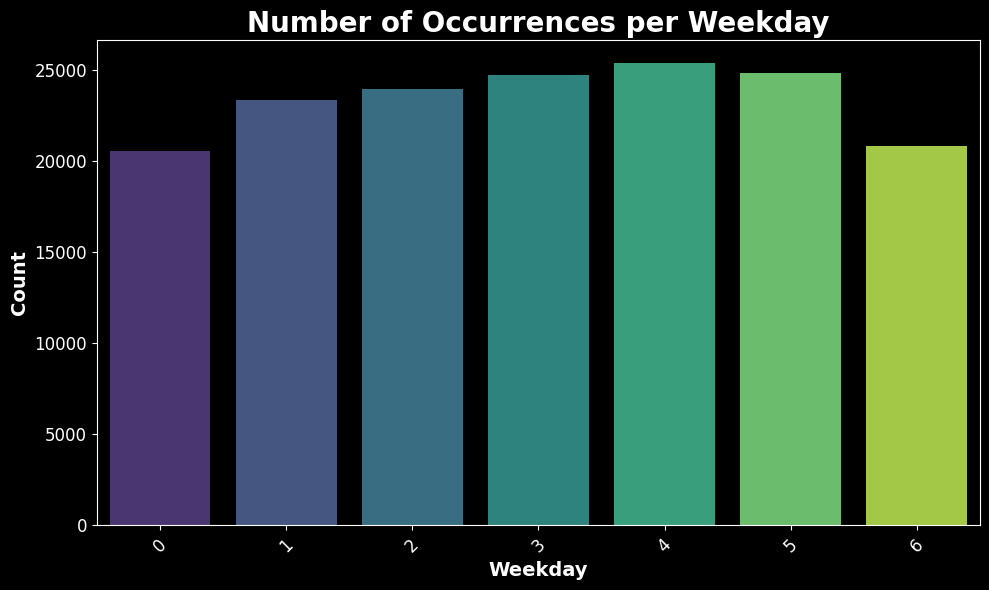

In [246]:
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=df_time, palette="viridis")
plt.title('Number of Occurrences per Weekday', fontsize=20, fontweight='bold')
plt.xlabel('Weekday', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [244]:
df.to_csv('../datasets/df_after_outlier_detection.csv',index=False)